The import package section is crucial because it sets up the script with all the external libraries and tools required for the project. Each imported package provides specific functionality, and importing them ensures that we can use pre-built methods and utilities instead of writing everything from scratch.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import great_expectations as ge
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy import stats

In [14]:
df = pd.read_csv("C:\\Users\\ajisy\\Downloads\\StudentPerformanceFactors.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Dataset regarding the influence of several factors on student performance. The columns present in the dataset are:
- Hours_Studied: Number of hours spent studying per week.
- Attendance: Percentage of classes attended.                  
- Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High).        
- Access_to_Resources: Availability of educational resources (Low, Medium, High).         
- Extracurricular_Activities: Participation in extracurricular activities (Yes, No).  
- Sleep_Hours: Average number of hours of sleep per night.
- Previous_Scores: Scores from previous exams.            
- Motivation_Level: Student's level of motivation (Low, Medium, High).         
- Internet_Access: Availability of internet access (Yes, No).  
- Tutoring_Sessions: Number of tutoring sessions attended per month.
- Family_Income: Family income level (Low, Medium, High).               
- Teacher_Quality: Quality of the teachers (Low, Medium, High).
- School_Type: Type of school attended (Public, Private).   
- Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative).
- Physical_Activity: Average number of hours of physical activity per week.  
- Learning_Disabilities: Presence of learning disabilities (Yes, No).
- Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate).
- Distance_from_Home: Distance from home to school (Near, Moderate, Far).  
- Gender: Gender of the student (Male, Female).
- Exam_Score: Final exam score.          


# EDA

In [16]:
df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


Showing descriptive statistics about several factors that may influence student perfomance:

Parenteral involvement, most parents are moderately involved in their children's education

Access to Resurces, access to educational resources is moderate for most students. Improving access could help enhance learning outcomes

Extracurricular activites, participation in extracurricular activities is relatively high, which could improve students' social skills and motivation

Motivation Level, students' motivation is generally moderate

Internet Access, internet access is almost universal

Family income, most students come from low-income families

Teacher Quality, the majority of students are served by teachers with medium quality

School type, most students attend public schools

Peer influence, Most students are positively influenced by their peers

Learning disabilities, most students do not have learning disabilities

Parental education level, most parents have a high school education

Distance from home, most students live near their schools

Gender, majority of stundets as subject are male

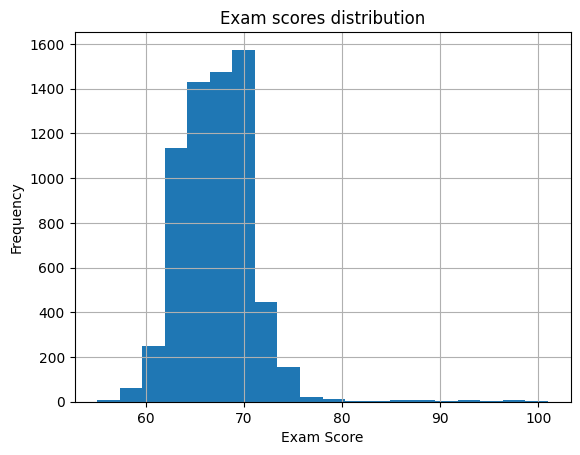

In [17]:
df['Exam_Score'].hist(bins=20)
plt.title('Exam scores distribution')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

ANOVA between Parental_Involvement and Exam_Score:
F-statistic: 84.49
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



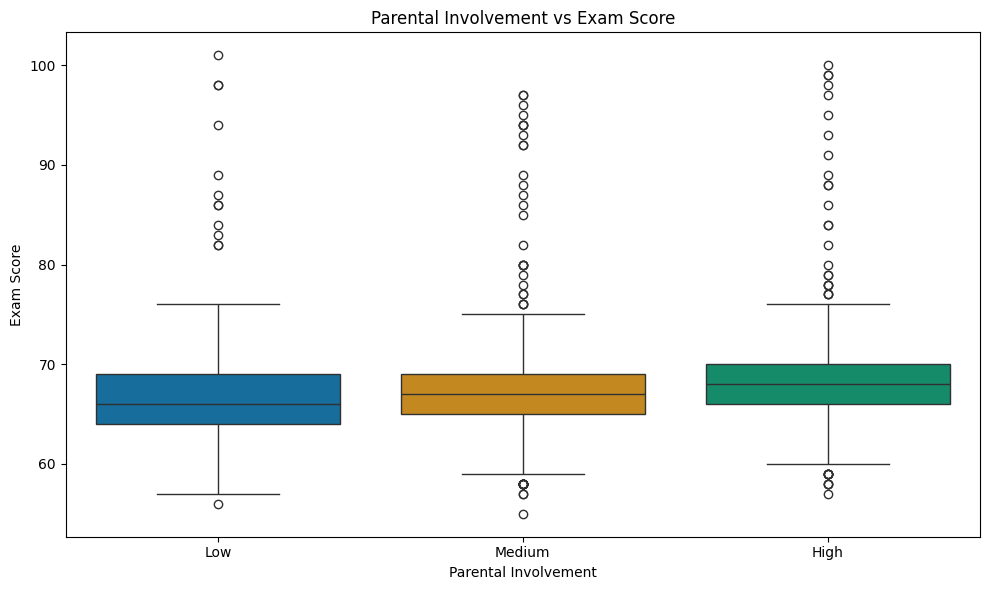

In [18]:
# Function to perform t-test or ANOVA for categorical vs numerical variables and plot boxplot
def cat_num_analysis(data, cat_var, num_var):
    # Check number of unique categories
    unique_categories = data[cat_var].nunique()

    # Perform t-test if two categories, ANOVA if more than two
    if unique_categories == 2:
        # Independent t-test
        # Grouping the data based on the categorical variable
        group1 = data[data[cat_var] == data[cat_var].unique()[0]][num_var]
        group2 = data[data[cat_var] == data[cat_var].unique()[1]][num_var]

        
        # Perform independent t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"T-test between {cat_var} and {num_var}:")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"p-value: {p_value:.4f}\n")
    else:
        # One-way ANOVA if more than two categories
        groups = [data[data[cat_var] == category][num_var].dropna() for category in data[cat_var].unique()]
        
        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"ANOVA between {cat_var} and {num_var}:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"p-value: {p_value:.4f}\n")

    # Conclusion based on p-value
    if p_value < 0.05:
        print("There is a significant difference in the numerical variable across categories.\n")
    else:
        print("There is no significant difference in the numerical variable across categories.\n")

    # Boxplot visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=num_var, data=data, hue = cat_var, palette="colorblind")

    # Format the title and labels
    plt.title(f'{cat_var.replace("_", " ").title()} vs {num_var.replace("_", " ").title()}')
    plt.xlabel(cat_var.replace('_', ' ').title())
    plt.ylabel(num_var.replace('_', ' ').title())

    # Show the plot
    plt.tight_layout()
    plt.show()

cat_num_analysis(df, 'Parental_Involvement', 'Exam_Score')

In the statistical analysis between parental_involvement and exam_score, the ANOVA test results show a F-statistic of 80.46 and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the categories of parental involvement. The results clearly suggest that parental involvement has a significant impact on exam performance, with students who receive higher levels of involvement performing better on average.

# Data Cleaning

In [19]:
# Handle missing value
missing_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
df[missing_columns] = df[missing_columns].fillna(df[missing_columns].mode().iloc[0])

# Standardize text by trimming, capitalizing, and normalizing each column
text_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                  'Family_Income', 'School_Type', 'Peer_Influence', 'Gender', 
                  'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
for col in text_columns:
    df[col] = df[col].str.strip().str.capitalize()
    # Normalisasi nilai teks
    df[col] = df[col].replace({'Yes': 'Ya', 'No': 'Tidak'})

# Fix value in column 'Exam_Score' within range 0 - 100
df['Exam_Score'] = df['Exam_Score'].apply(lambda x: 100 if x > 100 else x)

# Check min dan max value pada kolom dengan tipe data int
int_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
for col in int_columns:
    print(f"{col} min: {df[col].min()}, max: {df[col].max()}")



Hours_Studied min: 1, max: 44
Attendance min: 60, max: 100
Sleep_Hours min: 4, max: 10
Previous_Scores min: 50, max: 100
Tutoring_Sessions min: 0, max: 8
Physical_Activity min: 0, max: 6
Exam_Score min: 55, max: 100


In [20]:
df['uID'] = range(1, len(df) + 1)
df = df.set_index('uID')

In [21]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
uID,,,,,,,,,,,,,,,,,,,,
1,23,84,Low,High,Tidak,7,73,Low,Ya,0,Low,Medium,Public,Positive,3,Tidak,High School,Near,Male,67
2,19,64,Low,Medium,Tidak,8,59,Low,Ya,2,Medium,Medium,Public,Negative,4,Tidak,College,Moderate,Female,61
3,24,98,Medium,Medium,Ya,7,91,Medium,Ya,2,Medium,Medium,Public,Neutral,4,Tidak,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Ya,8,98,Medium,Ya,1,Medium,Medium,Public,Negative,4,Tidak,High School,Moderate,Male,71
5,19,92,Medium,Medium,Ya,6,65,Medium,Ya,3,Medium,High,Public,Neutral,4,Tidak,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6603,25,69,High,Medium,Tidak,7,76,Medium,Ya,1,High,Medium,Public,Positive,2,Tidak,High School,Near,Female,68
6604,23,76,High,Medium,Tidak,8,81,Medium,Ya,3,Low,High,Public,Positive,2,Tidak,High School,Near,Female,69
6605,20,90,Medium,Low,Ya,6,65,Low,Ya,3,Low,Medium,Public,Negative,2,Tidak,Postgraduate,Near,Female,68


In [22]:
df.to_csv('P2M3_muhammad-aji_data_clean.csv') 

# Data Validation

In [23]:
# Create a data context

from great_expectations.data_context import FileDataContext

context = FileDataContext.create(project_root_dir='./')

In [26]:
# Give a name to a Datasource. This name must be unique between Datasources.
datasource_name = 'perf-std'
datasource = context.sources.add_pandas(datasource_name)

# Give a name to a data asset
asset_name = 'std_per'
path_to_data = 'P2M3_muhammad-aji_data_clean.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

# Build batch request
batch_request = asset.build_batch_request()

In [27]:
# Creat an expectation suite
expectation_suite_name = 'expectation-trip-dataset'
context.add_or_update_expectation_suite(expectation_suite_name)

# Create a validator using above expectation suite
validator = context.get_validator(
    batch_request = batch_request,
    expectation_suite_name = expectation_suite_name
)

# Check the validator
validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,uID,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,1,23,84,Low,High,Tidak,7,73,Low,Ya,...,Low,Medium,Public,Positive,3,Tidak,High School,Near,Male,67
1,2,19,64,Low,Medium,Tidak,8,59,Low,Ya,...,Medium,Medium,Public,Negative,4,Tidak,College,Moderate,Female,61
2,3,24,98,Medium,Medium,Ya,7,91,Medium,Ya,...,Medium,Medium,Public,Neutral,4,Tidak,Postgraduate,Near,Male,74
3,4,29,89,Low,Medium,Ya,8,98,Medium,Ya,...,Medium,Medium,Public,Negative,4,Tidak,High School,Moderate,Male,71
4,5,19,92,Medium,Medium,Ya,6,65,Medium,Ya,...,Medium,High,Public,Neutral,4,Tidak,College,Near,Female,70


In [28]:
#Expectation 1 : Column uID must be unique
validator.expect_column_values_to_be_unique('uID')

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [29]:
#Expectation 2: Column 'Exam_Score' harus memiliki nilai antara 0 dan 100
validator.expect_column_values_to_be_between('Exam_Score', min_value=0, max_value=100)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [30]:
#Expectation 3: Column 'Gender' harus memiliki nilai dalam set {'Male', 'Female'}
validator.expect_column_values_to_be_in_set('Gender', {'Male', 'Female'})

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [31]:
# Expectation 4: Column 'Learning_Disabilities' harus memiliki nilai dalam tipe binary
validator.expect_column_values_to_be_in_set('Learning_Disabilities', {0, 1})

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": false,
  "result": {
    "element_count": 6607,
    "unexpected_count": 6607,
    "unexpected_percent": 100.0,
    "partial_unexpected_list": [
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak",
      "Tidak"
    ],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 100.0,
    "unexpected_percent_nonmissing": 100.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [32]:
# Expectation 5: Column 'Parental_Involvement' harus memiliki nilai dalam set {'High', 'Medium', 'Low'}
validator.expect_column_values_to_be_in_set('Parental_Involvement', {'High', 'Medium', 'Low'})

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [33]:
#Expectation 6: Column 'School_Type' harus memiliki nilai dalam set {'Good', 'Average', 'Bad'}
validator.expect_column_values_to_be_in_set('School_Type', {'Private', 'Public'})


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [34]:
#Expectation 7: Column 'Sleep_Hours' harus memiliki nilai antara 0 dan 12
validator.expect_column_values_to_be_between('Sleep_Hours', min_value=0, max_value=12)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6607,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [35]:
# Save into Expectation Suite

validator.save_expectation_suite(discard_failed_expectations=False)

In [36]:
# Create a checkpoint

checkpoint_1 = context.add_or_update_checkpoint(
    name = 'checkpoint_1',
    validator = validator,
)

In [37]:
# Run a checkpoint

checkpoint_result = checkpoint_1.run()

Calculating Metrics:   0%|          | 0/52 [00:00<?, ?it/s]

In [38]:
# Build data docs

context.build_data_docs()

{'local_site': 'file://c:\\Users\\ajisy\\Documents\\hacktiv8\\p2-coda002-rmt-m3-majisyah13\\gx\\gx\\uncommitted/data_docs/local_site/index.html'}